# Simple network of two hidden dense layers

## Stochastic gradient descent / online learning

Retropropagation 
- en utilisant une boucle explicite
- en mettant à jour après chaque observation (online learning / stochastic gradient descent)

Architecture

    input (layer0) : 2 variables
    layer 1: 3 neurons (sigmoid)
    layer 2: 5 neurons (sigmoid)
    layer 3 (output) : single neuron (sigmoid)

    L0  L1   L2   L3
    
    x1    /  o 
      \ o    o  \
        o    o    o ->
      / o    o  /
    x2    \  o
    
    

$W_1 \in M_{3,2}$

$W_2 \in M_{5,3}$

$W_3 \in M_{1, 5}$






In [202]:
from time import time

import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randn
from sklearn.datasets import make_moons

### Dataset

In [203]:
X, y = make_moons(n_samples=20, noise=0.05, random_state=12345)  # not too hard

X.shape, y.shape

((20, 2), (20,))

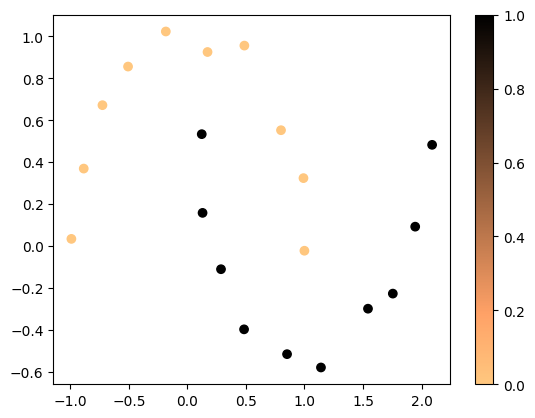

In [204]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="copper_r")
plt.colorbar()
plt.show()

## Network construction / initialisation


In [205]:
# random init for weights
np.random.seed(124)


# Weights matrix: one line per neuron, one column per neuron in the previous layer
W1 = randn(3, 2)
# Column vector of bias (compatible with forward pass formula)
b1 = randn(3, 1)

W2 = randn(5, 3)
b2 = randn(5, 1)

W3 = randn(1, 5)
b3 = randn(1, 1)  # not a scalar (!) but 1x1 matrix

In [206]:
W1

array([[ 0.28847906, -0.46295408],
       [-1.33800442,  2.31701567],
       [-1.46737593, -0.74854769]])

In [207]:
# fonction d'activation


def sigma(x):
    return 1 / (1 + np.exp(-x))


def sigprim(x):
    return sigma(x) * (1 - sigma(x))

## Forward pass for *one* training instance

In [208]:
# We will process just the first training example
# To use the same notation as on paper, we put it in a 2D column vector
# Activations of the input layer:


ind0 = 0  # whatever
X_one_training = X[ind0, :]
y_one_training = np.array(y[ind0]).reshape(
    [
        1,
    ]
)

a0 = X_one_training.reshape(
    [2, 1]
)  # image of activation function, one observed values in the first layer

print(f"{a0.shape =}\n{a0 =}")

a0.shape =(2, 1)
a0 =array([[ 0.48401714],
       [-0.3972736 ]])


In [209]:
# First forward pass
z1 = W1 @ a0 + b1
a1 = sigma(z1)
a1.shape

(3, 1)

In [210]:
# second layer
z2 = W2 @ a1 + b2
a2 = sigma(z2)
a2.shape

(5, 1)

In [211]:
# third layer
z3 = W3 @ a2 + b3
a3 = sigma(z3)
a3.shape

(1, 1)

In [212]:
y_pred = [1 if predict_proba > 0.5 else 0 for predict_proba in a3]
print(f"{y_pred =}\n{y_one_training =}")

y_pred =[0]
y_one_training =array([1])



## Backpropagation for one training instance

Error (shift, correction?) in the output layer [**BP1**]

$\displaystyle \delta_j^L = \frac{\partial C}{\partial a_j^L} \sigma'(z_j^L)$ 



(only one neuron here, so $j$ index might be omitted)

In [213]:
# un seul neurone et une seule observation (ind0)
# etape 1
delta3 = (a3 - y_one_training) * sigprim(z3)
print(f"{delta3 = }\n{delta3.shape =}")

delta3 = array([[-0.12068905]])
delta3.shape =(1, 1)


Backpropagate the error [**BP2**]

$\displaystyle \delta^l = ((w^{l+1})^T)\delta^{l+1} \odot \sigma'(z^{l})$

In [214]:
delta2 = sigprim(z2) * (W3.T @ delta3)
print(f"{delta2 = }\n{delta2.shape =}")

delta2 = array([[ 0.03233452],
       [-0.01356514],
       [ 0.01342836],
       [-0.00326986],
       [ 0.05845582]])
delta2.shape =(5, 1)


In [215]:
delta1 = sigprim(z1) * (W2.T @ delta2)
print(f"{delta1 = }\n{delta1.shape =}")

delta1 = array([[ 0.01073452],
       [-0.00197333],
       [-0.00703027]])
delta1.shape =(3, 1)


The gradient for the biases [**BP3**]

$\displaystyle \frac{\partial C}{\partial b_j^l} = \delta_j^l$

In [216]:
nabla_bias = [delta1, delta2, delta3]

The gradient for weights **[BP4]**, mathematical formula

$\displaystyle \frac{\partial C}{\partial w_{jk}^l} = a_k^{l-1}\delta_j^l = \delta_j^l a_k^{l-1} $


In [217]:
nabla_W3 = np.zeros(W3.shape)

for j in range(W3.shape[0]):
    for k in range(W3.shape[1]):
        nabla_W3[j, k] = a2[k] * delta3[j]


nabla_W3.shape

/tmp/ipykernel_71219/1041272380.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  nabla_W3[j, k] = a2[k] * delta3[j]


(1, 5)

In [218]:
nabla_W2 = np.zeros(W2.shape)


for j in range(W2.shape[0]):
    for k in range(W2.shape[1]):
        nabla_W2[j, k] = a1[k] * delta2[j]


nabla_W2.shape

/tmp/ipykernel_71219/3167569450.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  nabla_W2[j, k] = a1[k] * delta2[j]


(5, 3)

In [219]:
nabla_W1 = np.zeros(W1.shape)
for j in range(W1.shape[0]):
    for k in range(W1.shape[1]):
        nabla_W1[j, k] = a0[k] * delta1[j]
nabla_W1.shape

/tmp/ipykernel_71219/4221456966.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  nabla_W1[j, k] = a0[k] * delta1[j]


(3, 2)

### Updating the network


In [220]:
eta = 0.1

b1 -= eta * nabla_bias[0]
b2 -= eta * nabla_bias[1]
b3 -= eta * nabla_bias[2]
W1 -= eta * nabla_W1
W2 -= eta * nabla_W2
W3 -= eta * nabla_W3

Cela termine un cycle ("step") de l'apprentissage on-line (i.e. on actualise les poids a chaque apprentissage sur une observation).  
Pour faire une epoch complete, il faut parcourir toutes les observations

## Putting it all together
in a complete learning loop

### Initialisation du reseau de neurones

In [221]:
# INITIALISATION

n_epochs = 1000
n_individus = X.shape[0]
eta = 0.1  # tx d'apprentissage


nabla_W1 = np.zeros(W1.shape)  # gradient for the weights


nabla_W2 = np.zeros(W2.shape)


nabla_W3 = np.zeros(W3.shape)


# Weights = {f"W{i}": W for i, W in enumerate([W1, W2, W3])}
# TODO: del above line

In [222]:
predict_probas = np.zeros(
    [n_individus]
)  # stocke les probas predites par le reseau de neurones


mse_hist = []  # store mse values through the epochs
time_hist = []  # store time spent for a batch of epochs

tic = time()  # in order to measure the time spent for the training

### Entrainement de type on-line

In [90]:
# ON LINE
for ep in range(1, n_epochs + 1):
    mse = 0  # on reinitialise la MSE pour un nouvel entrainement

    for ind in range(n_individus):
        a0 = X[ind : ind + 1, :].T  # attention, si tu veux modifier, a la shape

        z1 = W1 @ a0 + b1
        a1 = sigma(z1)

        z2 = W2 @ a1 + b2
        a2 = sigma(z2)

        z3 = W3 @ a2 + b3
        a3 = sigma(z3)

        mse += ((a3 - y[ind]) ** 2) / n_individus  # a3 is a 1x1 matrix

        # backpropagation
        delta3 = (a3 - y[ind]) * sigprim(z3)  # un tableau 1x1
        delta2 = (W3.T @ delta3) * sigprim(z2)
        delta1 = (W2.T @ delta2) * sigprim(z1)

        nabla_bias1 = delta1
        nabla_bias2 = delta2
        nabla_bias3 = delta3

        nabla_W1 = np.zeros(W1.shape)
        for j in range(W1.shape[0]):
            for k in range(W1.shape[1]):
                nabla_W1[j, k] += a0[k] * delta1[j]

        nabla_W2 = np.zeros(W2.shape)
        for j in range(W2.shape[0]):
            for k in range(W2.shape[1]):
                nabla_W2[j, k] += a1[k] * delta2[j]

        nabla_W3 = np.zeros(W3.shape)
        for j in range(W3.shape[0]):
            for k in range(W3.shape[1]):
                nabla_W3[j, k] += a2[k] * delta3[j]

        if ep == n_epochs - 1:
            predict_probas[ind] = a3  # on recupere les probas a la derniere epoch

        # fin de calcul pour une observation

        # Mise a jour des biais et poids
        b1 -= eta * nabla_bias1
        b2 -= eta * nabla_bias2
        b3 -= eta * nabla_bias3
        W1 -= eta * nabla_W1
        W2 -= eta * nabla_W2
        W3 -= eta * nabla_W3

    # fin de boucle sur les observations, cad fin d'une epoch

    # calcul et affichage de l'etat de l'entrainement a la fin de certaines epochs
    if ep % 100 == 0:
        toc = time()
        temps = np.round(toc - tic, 2)
        tic = toc

        print(f"{ep =}\nmse = {float(mse)}\ntemps pour 100 epochs = {temps}")
        mse_hist.append(float(mse))
        time_hist.append(float(temps))

/tmp/ipykernel_71219/2483056821.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  nabla_W1[j, k] += a0[k] * delta1[j]
/tmp/ipykernel_71219/2483056821.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  nabla_W2[j, k] += a1[k] * delta2[j]
/tmp/ipykernel_71219/2483056821.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  nabla_W3[j, k] += a2[k] * delta3[j]
/tmp/ipykernel_71219/2483056821.py:64: DeprecationWarning: Conversion of an array with ndim > 0 to a scala

ep =100
mse = 0.1203849452814399
temps pour 100 epochs = 23.92
ep =200
mse = 0.12001213223968374
temps pour 100 epochs = 0.52
ep =300
mse = 0.1193770023564152
temps pour 100 epochs = 0.53
ep =400
mse = 0.11806128044212459
temps pour 100 epochs = 0.7
ep =500
mse = 0.11492920736389121
temps pour 100 epochs = 0.75
ep =600
mse = 0.10785267452715724
temps pour 100 epochs = 0.53
ep =700
mse = 0.09464904163532413
temps pour 100 epochs = 0.47
ep =800
mse = 0.07589088463542269
temps pour 100 epochs = 0.51
ep =900
mse = 0.057124005566061745
temps pour 100 epochs = 0.47
ep =1000
mse = 0.04182347177235595
temps pour 100 epochs = 0.49


/tmp/ipykernel_71219/2483056821.py:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predict_probas[ind] = a3  # on recupere les probas a la derniere epoch


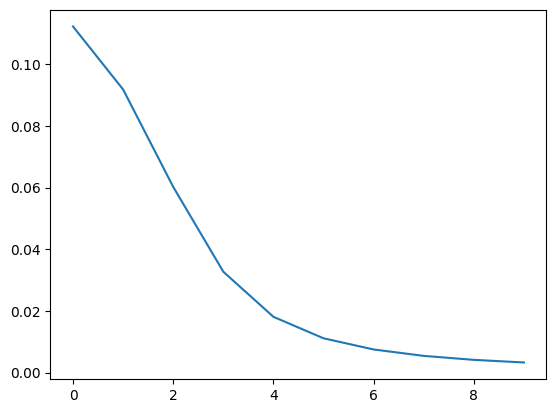

In [51]:
plt.plot(mse_hist)

### Entrainement de type full batch

#### Initialisation du reseau de neurones

In [246]:
# INITIALISATION

n_epochs = 10000
n_individus = X.shape[0]
eta = 1  # tx d'apprentissage


nabla_W1 = np.zeros(W1.shape)  # gradient for the weights


nabla_W2 = np.zeros(W2.shape)


nabla_W3 = np.zeros(W3.shape)


# Weights = {f"W{i}": W for i, W in enumerate([W1, W2, W3])}
# TODO: del above line

In [247]:
predict_probas = np.zeros(
    [n_individus]
)  # stocke les probas predites par le reseau de neurones


mse_hist = []  # store mse values through the epochs
time_hist = []  # store time spent for a batch of epochs

tic = time()  # in order to measure the time spent for the training

In [248]:
# FULL BATCH
for ep in range(1, n_epochs + 1):
    mse = 0  # on reinitialise la MSE pour un nouvel entrainement

    nabla_W1 = np.zeros(W1.shape)
    nabla_W2 = np.zeros(W2.shape)
    nabla_W3 = np.zeros(W3.shape)

    for ind in range(n_individus):
        a0 = X[ind : ind + 1, :].T

        z1 = W1 @ a0 + b1
        a1 = sigma(z1)

        z2 = W2 @ a1 + b2
        a2 = sigma(z2)

        z3 = W3 @ a2 + b3
        a3 = sigma(z3)

        mse += ((a3[0, 0] - y[ind]) ** 2)

        # backpropagation
        delta3 = (a3 - y[ind]) * sigprim(z3)  # un tableau 1x1
        delta2 = (W3.T @ delta3) * sigprim(z2)
        delta1 = (W2.T @ delta2) * sigprim(z1)

        nabla_bias1 = delta1
        nabla_bias2 = delta2
        nabla_bias3 = delta3

        for j in range(W1.shape[0]):
            for k in range(W1.shape[1]):
                nabla_W1[j, k] += a0[k] * delta1[j]

        for j in range(W2.shape[0]):
            for k in range(W2.shape[1]):
                nabla_W2[j, k] += a1[k] * delta2[j]

        for j in range(W3.shape[0]):
            for k in range(W3.shape[1]):
                nabla_W3[j, k] += a2[k] * delta3[j]

        if ep == n_epochs - 1:
            predict_probas[ind] = a3  # on recupere les probas a la derniere epoch

        # fin de calcul pour une observation

    # fin de boucle sur les observations, cad fin d'une epoch

    # Mise a jour des biais et poids
    b1 -= eta * nabla_bias1 / n_individus
    b2 -= eta * nabla_bias2 / n_individus
    b3 -= eta * nabla_bias3 / n_individus
    W1 -= eta * nabla_W1 / n_individus
    W2 -= eta * nabla_W2 / n_individus
    W3 -= eta * nabla_W3 / n_individus

    # calcul et affichage de l'etat de l'entrainement a la fin de certaines epochs
    if ep % 100 == 0:
        toc = time()
        temps = np.round(toc - tic, 2)
        tic = toc

        print(f"{ep =}\nmse = {float(mse)}\ntemps pour 100 epochs = {temps}")
        mse_hist.append(float(mse))
        time_hist.append(float(temps))

/tmp/ipykernel_71219/3631655081.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  nabla_W1[j, k] += a0[k] * delta1[j]
/tmp/ipykernel_71219/3631655081.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  nabla_W2[j, k] += a1[k] * delta2[j]
/tmp/ipykernel_71219/3631655081.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  nabla_W3[j, k] += a2[k] * delta3[j]


ep =100
mse = 1.7404733223795343
temps pour 100 epochs = 0.72
ep =200
mse = 1.7299494593737967
temps pour 100 epochs = 0.45
ep =300
mse = 1.7199978723661655
temps pour 100 epochs = 0.43
ep =400
mse = 1.7105548525970415
temps pour 100 epochs = 0.5
ep =500
mse = 1.7015645286642775
temps pour 100 epochs = 0.76
ep =600
mse = 1.6929780892736752
temps pour 100 epochs = 0.45
ep =700
mse = 1.6847529994760506
temps pour 100 epochs = 0.48
ep =800
mse = 1.6768522344598469
temps pour 100 epochs = 0.57
ep =900
mse = 1.6692435429313688
temps pour 100 epochs = 0.57
ep =1000
mse = 1.6618987457894276
temps pour 100 epochs = 0.42
ep =1100
mse = 1.6547930731270475
temps pour 100 epochs = 0.46
ep =1200
mse = 1.64790454223255
temps pour 100 epochs = 0.45
ep =1300
mse = 1.6412133803706066
temps pour 100 epochs = 0.41
ep =1400
mse = 1.6347014981503358
temps pour 100 epochs = 0.4
ep =1500
mse = 1.6283520218229672
temps pour 100 epochs = 0.4
ep =1600
mse = 1.6221488955387633
temps pour 100 epochs = 0.4
ep =170

/tmp/ipykernel_71219/3631655081.py:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predict_probas[ind] = a3  # on recupere les probas a la derniere epoch


### Affichage de l'evolution de l'entrainement

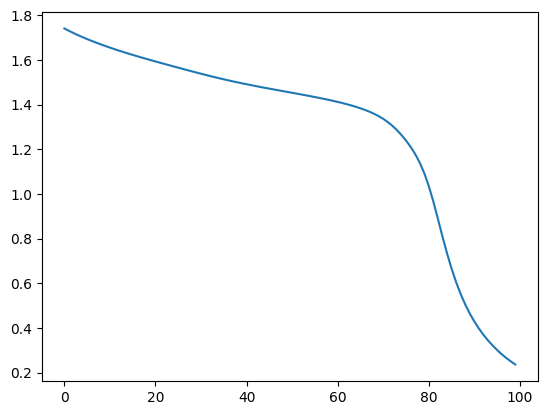

In [249]:
plt.plot(mse_hist)

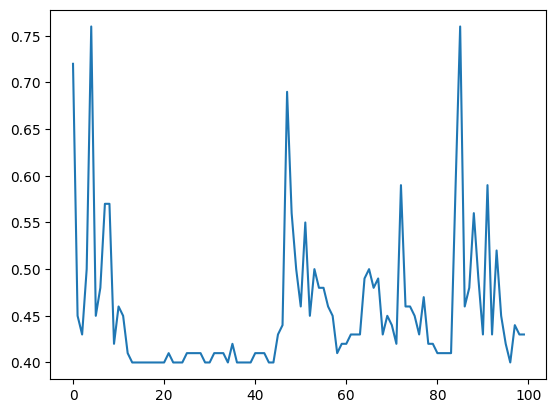

In [250]:
plt.plot(time_hist)

### Prediction des classes

In [251]:
y_pred = [True if proba > 0.5 else False for proba in predict_probas]
y_true_pred = [
    True if predicted_value == true_value else False
    for predicted_value, true_value in zip(y_pred, y)
]

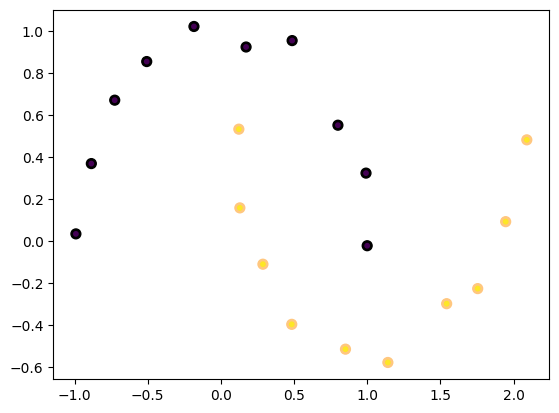

In [252]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="copper", s=50)
plt.scatter(X[:, 0], X[:, 1], c=y, s=10)

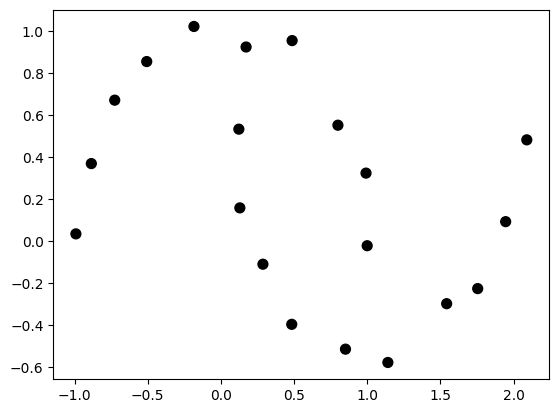

In [253]:
plt.scatter(X[:, 0], X[:, 1], c=y_true_pred, cmap="copper", s=50)

In [254]:
y_true_pred

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]